<a href="https://colab.research.google.com/github/yzang101/BAMLNOTEBOOK/blob/main/%E2%80%9CBusiness_Analytics_and_Machine_Learning_OLS_Regressions_Lecture%E2%80%9D%E7%9A%84%E5%89%AF%E6%9C%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.api as sm
import pandas as pd
from google.colab import files

# Plot about simple regression model

In [ ]:
# generate lin space of straight line

# set seed
np.random.seed(42)
alpha = 0.2
beta = 0.75

X_real = np.linspace(0, 30, 20)

y_real = alpha + beta * X_real

# add noise so that points are not on a perfect line
y = y_real + np.random.normal(size=20)


In [ ]:
# regression model
import statsmodels.api as sm

# add constant to predictor variables
X = sm.add_constant(X_real)

#fit linear regression model
model = sm.OLS(y, X).fit()

#view model summary
print(model.summary())

NameError: name 'X_real' is not defined

10.919208327787382


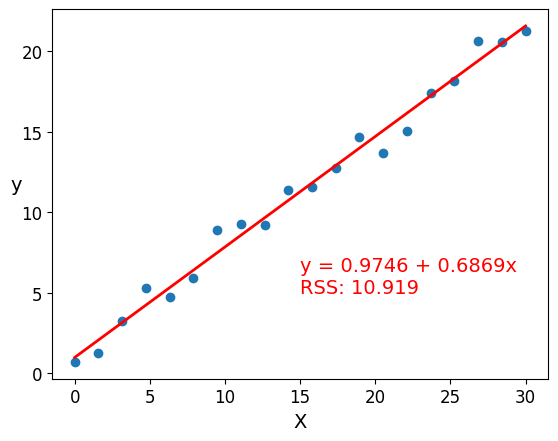

In [ ]:
# optimal values
a = 0.9746
b = 0.6869

y_hat = a + b * X_real

RSS = np.sum((y - y_hat) ** 2)
print(RSS)

plt.plot(X_real, y_hat, lw=2,c="red")
plt.scatter(X_real, y)
plt.xlabel("X", fontsize=14)
plt.ylabel("y", fontsize=14, rotation=0)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
#plt.text(15, 5, s="y = 0.9746 + 0.6869x", c="red", fontsize=14)
plt.text(15, 5, s="y = "+str(a)+" + "+str(b)+"x\nRSS: "+str(np.round(RSS, 3)), c="red", fontsize=14)
plt.show()

Non-optimal regression lines

67.02707096498733


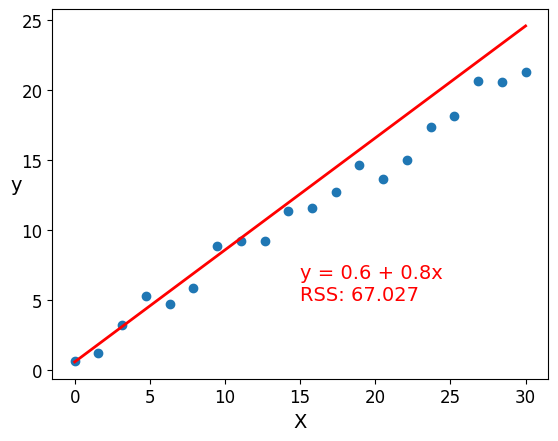

In [ ]:
a = 0.600
b = 0.800

y_hat = a + b * X_real

RSS = np.sum((y - y_hat) ** 2)
print(RSS)

plt.plot(X_real, y_hat, lw=2,c="red")
plt.scatter(X_real, y)
plt.xlabel("X", fontsize=14)
plt.ylabel("y", fontsize=14, rotation=0)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.text(15, 5, s="y = "+str(a)+" + "+str(b)+"x\nRSS: "+str(np.round(RSS, 3)), c="red", fontsize=14)
plt.show()

# Violation of BLUE assumptions

[-72.2607017   15.25201059]


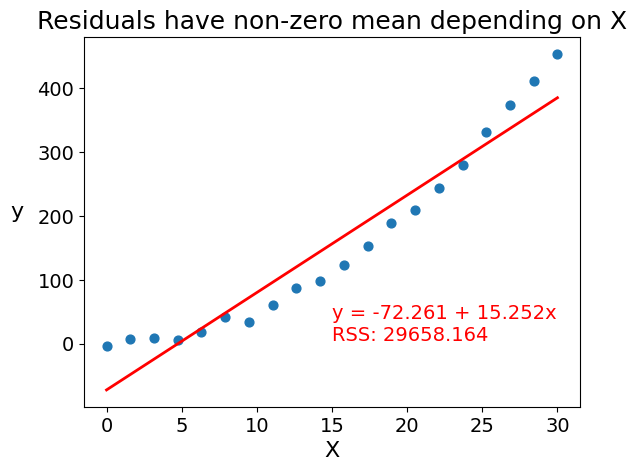

In [ ]:
# no linear relation: mean of residuals is non-zero for particular X

X_real = np.linspace(0, 30, 20)

np.random.seed(123)

y_true = 2 + 0.5 * X_real **2
y = y_true + np.random.normal(0, 5, size=len(X_real))

X = sm.add_constant(X_real)
model = sm.OLS(y, X).fit()

print(model.params)

a = np.round(model.params[0], 3)
b = np.round(model.params[1], 3)

residuals = model.resid
RSS = np.sum(residuals ** 2)

y_hat = model.fittedvalues

# plot regression line and data points

plt.plot(X_real, y_hat, lw=2,c="red")
plt.scatter(X_real, y, s=40)
plt.xlabel("X", fontsize=16)
plt.ylabel("y", fontsize=16, rotation=0, labelpad=15)
plt.title("Residuals have non-zero mean depending on X", fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.text(15, 5, s="y = "+str(a)+" + "+str(b)+"x\nRSS: "+str(np.round(RSS, 3)), c="red", fontsize=14)
plt.show()




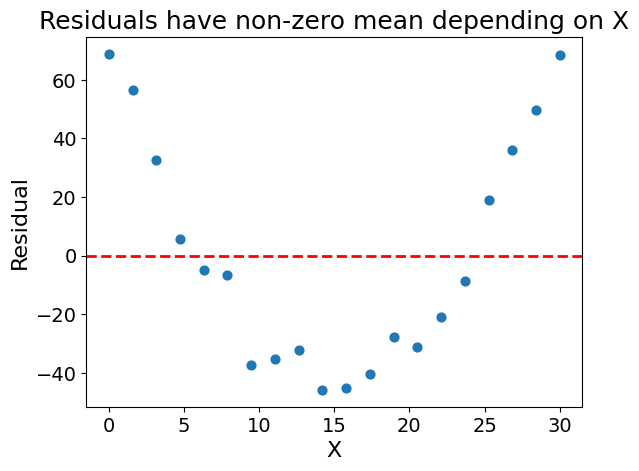

In [ ]:
# Residual-Plot
plt.scatter(X_real, residuals, s=40)
plt.axhline(0, color='red', lw=2, linestyle='--')
plt.title("Residuals have non-zero mean depending on X", fontsize=18)
plt.xlabel("X", fontsize=16)
plt.ylabel("Residual", fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

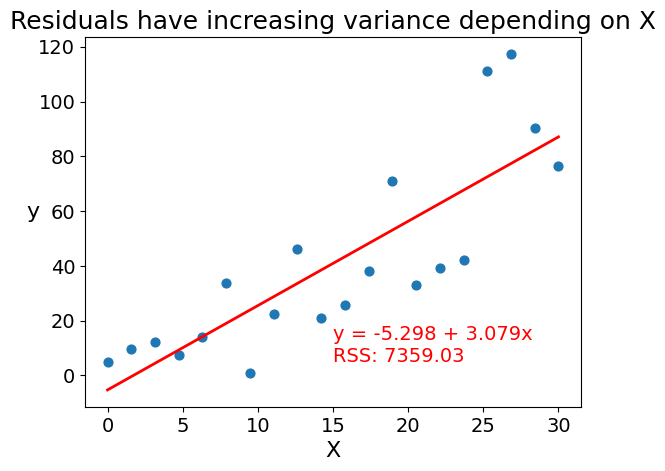

In [ ]:
# no zero variance for particular X

X_real = np.linspace(0, 30, 20)

np.random.seed(123)

errors = np.random.normal(0, X_real)  # increasing variance for X
y = 5 + 2 * X_real + errors

X = sm.add_constant(X_real)
model = sm.OLS(y, X).fit()

a = np.round(model.params[0], 3)
b = np.round(model.params[1], 3)

residuals = model.resid

RSS = np.sum(residuals ** 2)

y_hat = model.fittedvalues

# plot regression line and data points

plt.plot(X_real, y_hat, lw=2,c="red")
plt.scatter(X_real, y, s=40)
plt.xlabel("X", fontsize=16)
plt.ylabel("y", fontsize=16, rotation=0)
plt.title("Residuals have increasing variance depending on X", fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.text(15, 5, s="y = "+str(a)+" + "+str(b)+"x\nRSS: "+str(np.round(RSS, 3)), c="red", fontsize=14)
plt.show()

In [ ]:
print(np.mean(residuals))

# Residual-Plot
plt.scatter(X_real, residuals, s=40)
plt.axhline(0, color='red', lw=2, linestyle='--')
plt.title("Residuals have increasing variance depending on X", fontsize=18)
plt.xlabel("X", fontsize=16)
plt.ylabel("Residual", fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

[-0.20470766  0.28447106 -0.24919121 -0.79246195  1.21294172  2.54570047
  2.51132332  2.66750331  3.30315071  4.38442791  5.17239587  3.61755497
  3.71166885  3.75499829  4.92016521  5.56058629  3.28091967  2.74503115
  4.2768049   3.62439492]


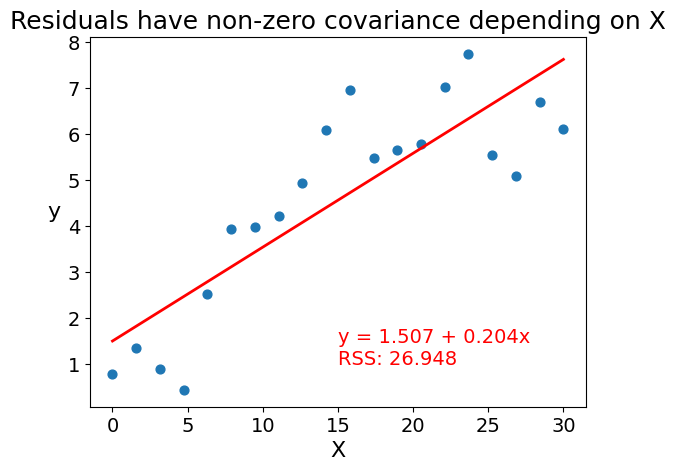

In [ ]:
# no zero covariance for particular X

X_real = np.linspace(0, 30, 20)

np.random.seed(12345)

#errors = np.zeros(len(X_real))
errors = np.random.normal(size=len(X_real))

rho = 0.95
for t in range(1, len(X_real)):
    errors[t] = rho * errors[t-1] + errors[t]

print(errors)

y = 1 + 0.05 * X_real + errors

X = sm.add_constant(X_real)
model = sm.OLS(y, X).fit()

a = np.round(model.params[0], 3)
b = np.round(model.params[1], 3)

residuals = model.resid
RSS = np.sum(residuals ** 2)

y_hat = model.fittedvalues

# plot regression line and data points

plt.plot(X_real, y_hat, lw=2,c="red")
plt.scatter(X_real, y, s=40)
plt.title("Residuals have non-zero covariance depending on X", fontsize=18)
plt.xlabel("X", fontsize=16)
plt.ylabel("y", fontsize=16, rotation=0, labelpad=10)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.text(15, 1, s="y = "+str(a)+" + "+str(b)+"x\nRSS: "+str(np.round(RSS, 3)), c="red", fontsize=14)
plt.show()


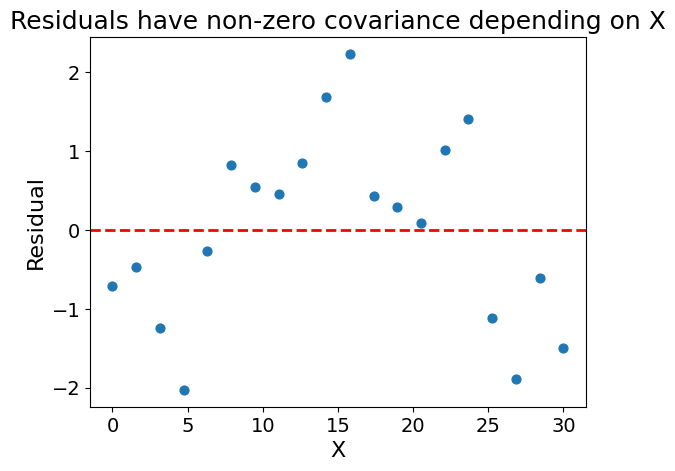

In [ ]:
# Residual-Plot
plt.scatter(X_real, residuals, s=40)
plt.axhline(0, color='red', lw=2, linestyle='--')
plt.title("Residuals have non-zero covariance depending on X", fontsize=18)
plt.xlabel("X", fontsize=16)
plt.ylabel("Residual", fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()



# Calculation of coefficients, standard errors, t-values, p-values, log likelihood

In [ ]:
import numpy as np
from scipy.stats import t

# number of observations
N = X.shape[0]

F = 1 # number of explanatory variables without intercept

# OLS estimates: beta_hat = (X'X)^(-1) X'y

# use @ for matrix multiplication
XtX_inv = np.linalg.inv(X.T @ X) # inverse
beta_hat = XtX_inv @ X.T @ y

# Predicted values and residuals
y_hat = X @ beta_hat
residuals = y - y_hat

mean_residuals = y - np.mean(y)

# Estimate of error variance (MLE version: divided by n)
sigma2_hat_mle = np.sum(residuals**2) / N

# Estimate of error variance (unbiased OLS version: divided by n - k)
sigma2_hat_ols = np.sum(residuals**2) / (N - F - 1)

# Standard errors: sqrt(diag(sigma^2 * (X'X)^-1))
standard_errors = np.sqrt(sigma2_hat_ols * np.diag(XtX_inv))

# t-values
t_values = beta_hat / standard_errors

# p-values (two-tailed t-test)
p_values = 2 * (1 - t.cdf(np.abs(t_values), df=N - F - 1))

# R-squared

R2 = 1 - np.sum(residuals**2) / np.sum(mean_residuals ** 2)
R2_adj = 1 - np.sum(residuals**2) / np.sum(mean_residuals ** 2) * (N - 1) / (N - F -1)

# Log-likelihood (assuming normal errors, MLE version)
log_likelihood = -0.5 * N * (np.log(2 * np.pi * sigma2_hat_mle) + 1)

aic = 2 * (F + 1) - 2 * log_likelihood
bic = np.log(N) * (F + 1) - 2 * log_likelihood

# Print results
print("Coefficients (beta):", beta_hat)
print("Standard Errors:", standard_errors)
print("t-values:", t_values)
print("p-values:", p_values)

print("R2: ", R2, "Adj R2: ", R2_adj)
print("Log-Likelihood (MLE):", log_likelihood)
print("AIC: ", aic)
print("BIC: ", bic)


Coefficients (beta): [0.97456663 0.68694232]
Standard Errors: [0.33564623 0.01912849]
t-values: [ 2.90355303 35.91200299]
p-values: [0.00947242 0.        ]
R2:  0.9862350799254938 Adj R2:  0.9854703621435768
Log-Likelihood (MLE): -22.326673285998403
AIC:  48.653346571996806
BIC:  50.64481111910479


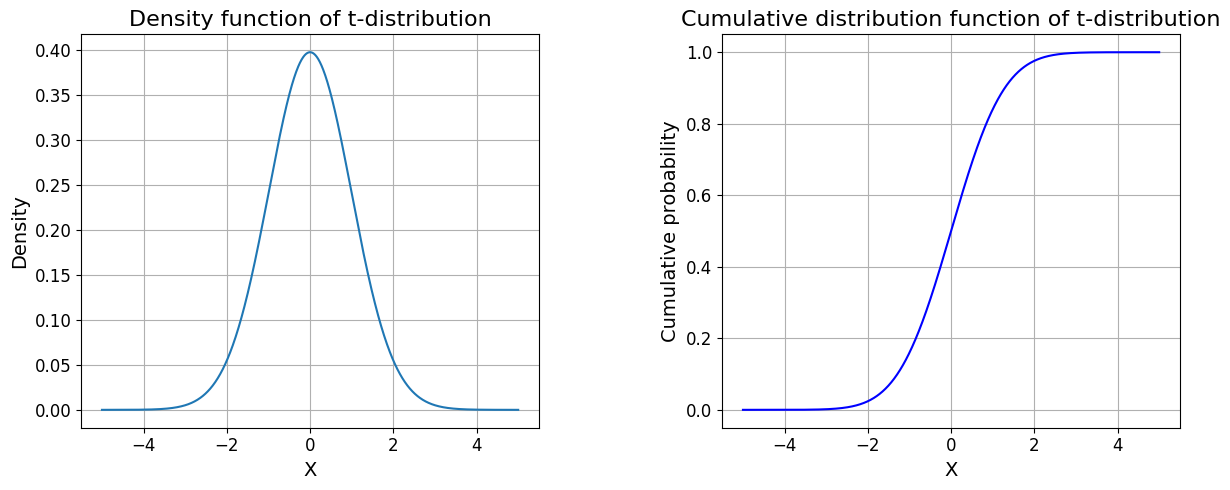

In [ ]:
from scipy.stats import t

# degrees of freedom
df = 100

# domain of x
x = np.linspace(-5, 5, 1000)

# density function and cumulative distribution function
pdf = t.pdf(x, df)
cdf = t.cdf(x, df)

# plot size
plt.figure(figsize=(12, 5))

# density (PDF)
plt.subplot(1, 2, 1)
plt.plot(x, pdf, label="Density function")
plt.title("Density function of t-distribution", fontsize=16)
plt.xlabel("X", fontsize=14)
plt.ylabel("Density", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)

# cumulative distribution function (CDF)
plt.subplot(1, 2, 2)
plt.plot(x, cdf, label="Cumulative distribution function (CDF)", color="blue")
plt.title("Cumulative distribution function of t-distribution", fontsize=16)
plt.xlabel("X", fontsize=14)
plt.ylabel("Cumulative probability", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.subplots_adjust(wspace=0.4)
plt.show()


# Melbourne housing

In [ ]:
import pandas as pd

pd.set_option('display.float_format', '{:.2f}'.format)  # no scientific notation

# upload melbourne_clean.csv

_ = files.upload()

In [ ]:
df = pd.read_csv("melbourne_clean.csv")


# drop unkown
df = df[df["Type"] != "unknown"]

# use winsorized BuildingArea and Landsize

df["BuildingArea"] = df["BuildingArea_winsorized"]
df["Landsize"] = df["Landsize_winsorized"]
df.head()

,Price,Suburb,Rooms,Type,Method,Date,Postcode,Bedrooms,Bathroom,Car,...,CouncilArea,Latitude,Longitude,Regionname,Propertycount,Rooms_winsorized,Landsize_winsorized,BuildingArea_winsorized,Car_Missing,distance_cbd_km
0,1480000.00,Abbotsford,2,House,S,3/12/2016,3067.00,2.00,1.00,1.00,...,Yarra City Council,-37.80,145.00,Northern Metropolitan,4019.00,2,202.00,NaN,False,4.25
1,1035000.00,Abbotsford,2,House,S,4/02/2016,3067.00,2.00,1.00,0.00,...,Yarra City Council,-37.81,144.99,Northern Metropolitan,4019.00,2,156.00,79.00,False,3.49
2,1465000.00,Abbotsford,3,House,SP,4/03/2017,3067.00,3.00,2.00,0.00,...,Yarra City Council,-37.81,144.99,Northern Metropolitan,4019.00,3,134.00,150.00,False,3.58
3,850000.00,Abbotsford,3,House,PI,4/03/2017,3067.00,3.00,2.00,1.00,...,Yarra City Council,-37.80,145.00,Northern Metropolitan,4019.00,3,94.00,NaN,False,4.20
4,941000.00,Abbotsford,2,House,S,7/05/2016,3067.00,2.00,1.00,0.00,...,Yarra City Council,-37.80,145.00,Northern Metropolitan,4019.00,2,181.00,NaN,False,3.77


In [ ]:
# summary stats

df["BuildingArea"].describe()

,BuildingArea
count,7301.00
mean,148.91
std,86.25
min,0.00
25%,100.00
50%,132.00
75%,180.00
max,3112.00


In [ ]:
df["Bedrooms"].describe()

,Bedrooms
count,24490.00
mean,2.95
std,0.89
min,0.00
25%,2.00
50%,3.00
75%,3.00
max,20.00


In [ ]:
# library
import statsmodels.formula.api as smf

#fit linear regression model
model = smf.ols("Price ~ BuildingArea + Bedrooms + distance_cbd_km + Landsize", data=df, missing='drop').fit()

#view model summary
print(model.summary())

summary_frame = model.summary2().tables[1]
print(summary_frame.round(4))

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.457
Model:                            OLS   Adj. R-squared:                  0.457
Method:                 Least Squares   F-statistic:                     1596.
Date:                Fri, 13 Jun 2025   Prob (F-statistic):               0.00
Time:                        11:55:01   Log-Likelihood:            -1.1017e+05
No. Observations:                7583   AIC:                         2.204e+05
Df Residuals:                    7578   BIC:                         2.204e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        3.064e+05   1.92e+04     

<ipython-input-60-1879808716>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["BuildingArea"] = df["BuildingArea_winsorized"]
<ipython-input-60-1879808716>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Landsize"] = df["Landsize_winsorized"]


Ex-post standardization:

In [ ]:
# standard deviations from the data

# make sure to have complete data that was used for regression

df_reg = df.dropna(subset=["Price", "BuildingArea", "Bedrooms", "distance_cbd_km", "Landsize"])
print("Obs: ", len(df_reg))

df_reg[["BuildingArea", "distance_cbd_km"]].describe()


Obs:  7583


,BuildingArea,distance_cbd_km
count,7583.00,7583.00
mean,148.62,14.27
std,77.56,9.31
min,0.00,0.07
25%,100.00,7.97
50%,132.00,12.24
75%,181.00,17.62
max,477.50,65.32


In [ ]:
sigma_area = df_reg["BuildingArea"].std()
sigma_price = df_reg["Price"].std()

print(sigma_cbd, sigma_area, sigma_price)

# ex-post normalized coefficients

beta_area_std = 3595.48 * sigma_area / sigma_price
beta_cbd_std = -29014.61 * sigma_cbd / sigma_price

print(beta_area_std, beta_cbd_std)

9.30611572630798 77.56097028300381 670283.3772615946
0.41604629757109296 -0.402834573515484


Categorical variables

In [ ]:
# here, it is better to use a different method to estimate the OLS model

# estimation equation is similar to R

model = smf.ols("Price ~ BuildingArea + C(Type)", data=df, missing='drop').fit()
print(model.summary())

summary_frame = model.summary2().tables[1]
print(summary_frame.round(4))

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.316
Model:                            OLS   Adj. R-squared:                  0.316
Method:                 Least Squares   F-statistic:                     1329.
Date:                Tue, 10 Jun 2025   Prob (F-statistic):               0.00
Time:                        22:11:44   Log-Likelihood:            -1.2637e+05
No. Observations:                8629   AIC:                         2.527e+05
Df Residuals:                    8625   BIC:                         2.528e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

# Interaction effects

In [ ]:
# define interaction variable

model = smf.ols("Price ~ BuildingArea + Bedrooms + distance_cbd_km + Landsize + C(Type) + distance_cbd_km * C(Type)", data=df, missing='drop').fit()

print(model.summary())

# actual values
summary_frame = model.summary2().tables[1]
print(summary_frame.round(4))

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.491
Model:                            OLS   Adj. R-squared:                  0.490
Method:                 Least Squares   F-statistic:                     912.1
Date:                Thu, 12 Jun 2025   Prob (F-statistic):               0.00
Time:                        10:52:22   Log-Likelihood:            -1.0993e+05
No. Observations:                7583   AIC:                         2.199e+05
Df Residuals:                    7574   BIC:                         2.199e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

In [ ]:
# marginal effects

print("ME house: ", model.params["distance_cbd_km"])
print("ME townhouse: ", model.params["distance_cbd_km"] + model.params["distance_cbd_km:C(Type)[T.Townhouse]"])
print("ME unit/duplex: ", model.params["distance_cbd_km"] + model.params["distance_cbd_km:C(Type)[T.Unit / Duplex]"])

# get variance covariance matrix
vcov = model.cov_params()

# standard errors
print("SE house: ", np.sqrt(vcov["distance_cbd_km"]["distance_cbd_km"]))
print("SE townhouse: ", np.sqrt(vcov["distance_cbd_km"]["distance_cbd_km"] + vcov["distance_cbd_km:C(Type)[T.Townhouse]"]["distance_cbd_km:C(Type)[T.Townhouse]"]+
                                2 * vcov["distance_cbd_km"]["distance_cbd_km:C(Type)[T.Townhouse]"]))
print("SE unit/duplex: ", np.sqrt(vcov["distance_cbd_km"]["distance_cbd_km"] + vcov["distance_cbd_km:C(Type)[T.Unit / Duplex]"]["distance_cbd_km:C(Type)[T.Unit / Duplex]"]+
                                2 * vcov["distance_cbd_km"]["distance_cbd_km:C(Type)[T.Unit / Duplex]"]))

print(vcov["distance_cbd_km"]["distance_cbd_km:C(Type)[T.Townhouse]"])

ME house:  -32925.10753427767
ME townhouse:  -12249.611342280274
ME unit/duplex:  -7857.265011603227
SE house:  676.4549301359116
SE townhouse:  3090.6091742758226
SE unit/duplex:  2352.3473845980975
-448866.30349269905


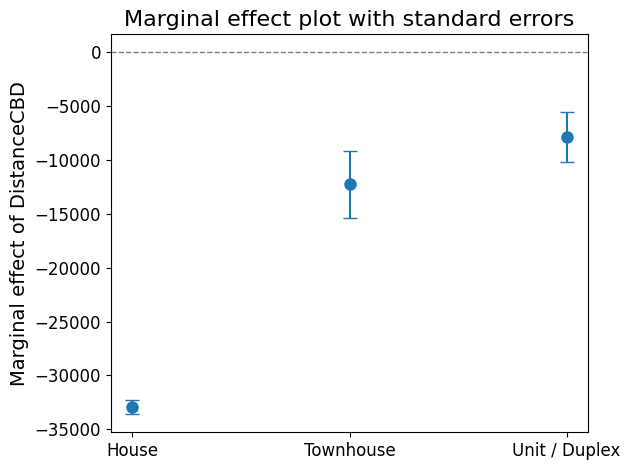

In [ ]:
# Marginal effect plots with SE

import matplotlib.pyplot as plt

# Example marginal effects and standard errors for 3 groups
groups = ['House', 'Townhouse', 'Unit / Duplex']
effects = np.array([-32925.10, -12249.61, -7857.26])      # marginal effects
errors = np.array([676.45, 3090.60, 2352.34])     # standard errors

# Plot
fig, ax = plt.subplots()
ax.errorbar(groups, effects, yerr=errors, fmt='o', capsize=5, markersize=8, linestyle='none')

# Formatting
ax.set_ylabel('Marginal effect of DistanceCBD', fontsize=14)
ax.set_title('Marginal effect plot with standard errors', fontsize=16)
ax.tick_params(axis='both', labelsize=12)
ax.axhline(0, color='gray', linestyle='--', linewidth=1)
plt.tight_layout()
plt.show()

t:  1.9602772462156715


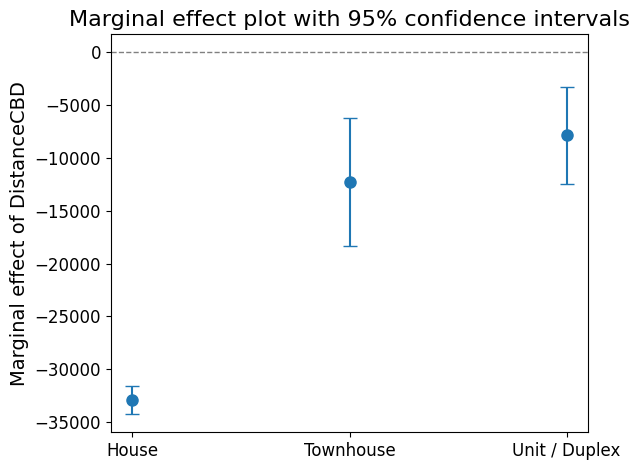

In [ ]:
# Marginal effect plots with confidence intervals

import matplotlib.pyplot as plt
from scipy.stats import t

# Example marginal effects and standard errors for 3 groups
groups = ['House', 'Townhouse', 'Unit / Duplex']
effects = np.array([-32925.10, -12249.61, -7857.26])      # marginal effects
errors = np.array([676.45, 3090.60, 2352.34])     # standard errors

df = int(model.df_resid)

# for 95% CI

alpha = 0.05

# get t value that corresponds to alpha given df
t_value = t.ppf(1 - alpha / 2, df)

print("t: ", t_value)

# Plot
fig, ax = plt.subplots()
ax.errorbar(groups, effects, yerr=t_value * errors, fmt='o', capsize=5, markersize=8, linestyle='none')

# Formatting
ax.set_ylabel('Marginal effect of DistanceCBD', fontsize=14)
ax.set_title('Marginal effect plot with 95% confidence intervals', fontsize=16)
ax.tick_params(axis='both', labelsize=12)
ax.axhline(0, color='gray', linestyle='--', linewidth=1)
plt.tight_layout()
plt.show()


# Pitfalls

Multicollinearity

In [ ]:
# define a new variable out of existing ones --> perfect correlation

df["Area"] = df["BuildingArea"] + df["Landsize"]

model = smf.ols("Price ~ BuildingArea + Landsize + distance_cbd_km + C(Type)", data=df, missing='drop').fit()

print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.463
Model:                            OLS   Adj. R-squared:                  0.462
Method:                 Least Squares   F-statistic:                     1306.
Date:                Fri, 13 Jun 2025   Prob (F-statistic):               0.00
Time:                        08:25:36   Log-Likelihood:            -1.1013e+05
No. Observations:                7583   AIC:                         2.203e+05
Df Residuals:                    7577   BIC:                         2.203e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

In [ ]:
model = smf.ols("Price ~ BuildingArea + Landsize + distance_cbd_km + C(Type)", data=df, missing='drop').fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.463
Model:                            OLS   Adj. R-squared:                  0.462
Method:                 Least Squares   F-statistic:                     1306.
Date:                Thu, 12 Jun 2025   Prob (F-statistic):               0.00
Time:                        17:01:06   Log-Likelihood:            -1.1013e+05
No. Observations:                7583   AIC:                         2.203e+05
Df Residuals:                    7577   BIC:                         2.203e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

Outliers

10.919208327787382


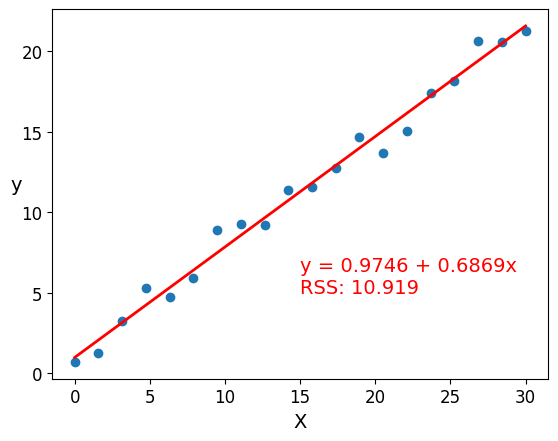

In [ ]:
import statsmodels.api as sm

# create data

# set seed
np.random.seed(42)
alpha = 0.2
beta = 0.75

X_real = np.linspace(0, 30, 20)

y_real = alpha + beta * X_real


y = y_real + np.random.normal(size=20)


X = sm.add_constant(X_real)

#fit linear regression model
model = sm.OLS(y, X).fit()

#view model summary
#print(model.summary())

# optimal values
a = 0.9746
b = 0.6869

y_hat = a + b * X_real

RSS = np.sum((y - y_hat) ** 2)
print(RSS)

plt.plot(X_real, y_hat, lw=2,c="red")
plt.scatter(X_real, y)
plt.xlabel("X", fontsize=14)
plt.ylabel("y", fontsize=14, rotation=0)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
#plt.text(15, 5, s="y = 0.9746 + 0.6869x", c="red", fontsize=14)
plt.text(15, 5, s="y = "+str(a)+" + "+str(b)+"x\nRSS: "+str(np.round(RSS, 3)), c="red", fontsize=14)
plt.show()


40015.831757006614


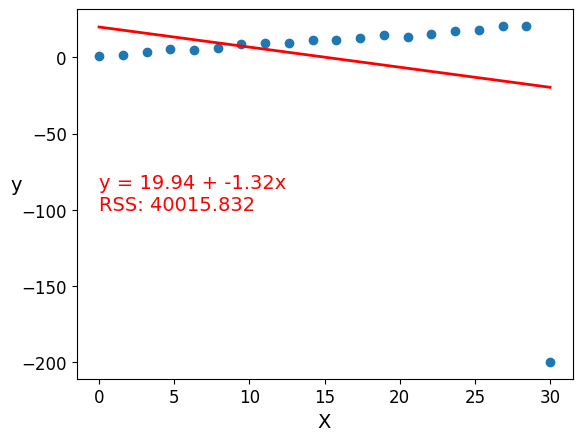

In [ ]:
# add outlier

y[-1] = -200

model = sm.OLS(y, X).fit()

a, b = np.round(model.params, 2)

y_hat = a + b * X_real

RSS = np.sum((y - y_hat) ** 2)
print(RSS)

plt.plot(X_real, y_hat, lw=2,c="red")
plt.scatter(X_real, y)
plt.xlabel("X", fontsize=14)
plt.ylabel("y", fontsize=14, rotation=0)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
#plt.text(15, 5, s="y = 0.9746 + 0.6869x", c="red", fontsize=14)
plt.text(0, -100, s="y = "+str(a)+" + "+str(b)+"x\nRSS: "+str(np.round(RSS, 3)), c="red", fontsize=14)
plt.show()


Omitted variable bias

            X  Cat          y
0   15.789474  0.0  26.010649
1   17.368421  0.0  31.915845
2   18.947368  0.0  39.824885
3   20.526316  0.0  40.301143
4   22.105263  0.0  45.427826
5   23.684211  0.0  50.183929
6   25.263158  0.0  60.201334
7   26.842105  0.0  64.899888
8   28.421053  0.0  67.271266
9   30.000000  0.0  70.772373
10   0.000000  1.0  21.474737
11   1.578947  1.0  27.718306
12   3.157895  1.0  27.602016
13   4.736842  1.0  36.562184
14   6.315789  1.0  36.439607
15   7.894737  1.0  42.408708
16   9.473684  1.0  50.235263
17  11.052632  1.0  50.300533
18  12.631579  1.0  57.614599
19  14.210526  1.0  60.908069
1963.2687008373603


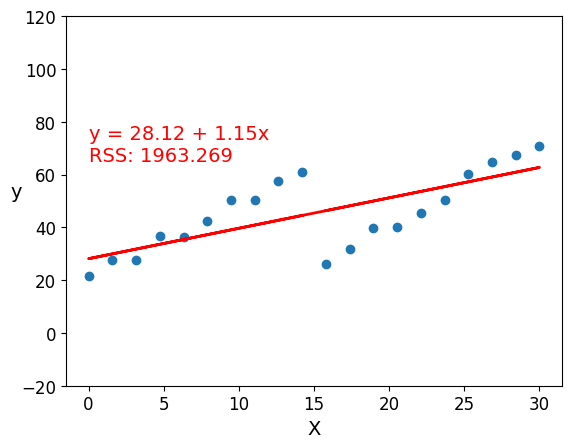

In [ ]:
# Seed for reproducibility
np.random.seed(123)

# Generate data: category 1
N = 20
half = int(N / 2)

X = np.linspace(0, 30, N)

beta = 3
intercept_1 = -20
intercept_2 = 20

# Error term

error = np.random.normal(0, 2, N)

y_1 = X * beta + intercept_1 + error

# sample again
error = np.random.normal(0, 2, N)
y_2 = X * beta + intercept_2 + error

# build dataframe

cat = np.concatenate((np.zeros(half), np.ones(half)))

X = np.concatenate((X[half:],X[:half]))

#print(X.shape)
y = np.concatenate((y_1[half:], y_2[:half]))

df_omit = pd.DataFrame({"X": X, "Cat" : cat, "y": y})

model_omit = smf.ols("y ~ X", data=df_omit, missing='drop').fit()
print(df_omit.head(30))
#print(model.summary())

a, b = np.round(model_omit.params, 2)
y_hat = model_omit.fittedvalues

RSS = np.sum((y - y_hat) ** 2)
print(RSS)

plt.plot(X, y_hat, lw=2,c="red")
plt.scatter(X, y)
plt.xlabel("X", fontsize=14)
plt.ylabel("y", fontsize=14, rotation=0)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylim((-20,120))
plt.text(0, 65, s="y = "+str(a)+" + "+str(b)+"x\nRSS: "+str(np.round(RSS, 3)), c="red", fontsize=14)
plt.show()

# Compare results
#print("Model with categorical variable:\n", model_full.summary())
#print("\nModel omitting categorical variable:\n", model_omit.summary())

Intercept   -19.076773
X             3.003209
Cat          38.864583
dtype: float64
89.39494587802132


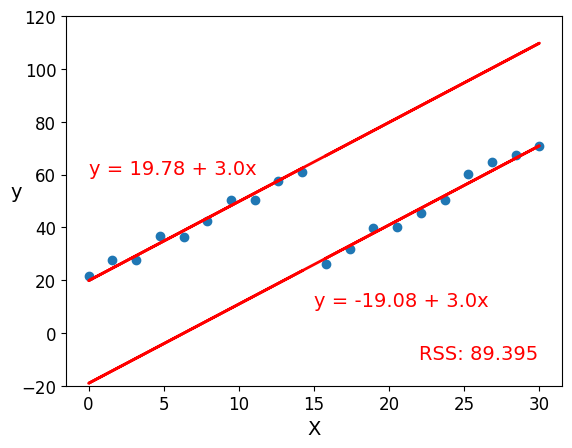

In [ ]:
model_included = smf.ols("y ~ X + Cat", data=df_omit, missing='drop').fit()

print(model_included.params)

a, b, c = np.round(model_included.params, 2)
y_hat = model_included.fittedvalues

RSS = np.sum((y - y_hat) ** 2)
print(RSS)

y_hat_1 = a + b * X
y_hat_2 = a+ b * X + c
plt.plot(X, y_hat_1, lw=2,c="red")
plt.plot(X, y_hat_2, lw=2,c="red")
plt.scatter(X, y)
plt.xlabel("X", fontsize=14)
plt.ylabel("y", fontsize=14, rotation=0)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylim((-20,120))
#plt.text(15, 5, s="y = 0.9746 + 0.6869x", c="red", fontsize=14)
plt.text(15, 10, s="y = "+str(a)+" + "+str(b)+"x", c="red", fontsize=14)
plt.text(0, 60, s="y = "+str(a+c)+" + "+str(b)+"x", c="red", fontsize=14)
plt.text(22, -10, s="RSS: "+str(np.round(RSS, 3)), c="red", fontsize=14)
plt.show()


Interaction with numerical variables

In [ ]:
# regression model with original BuildingArea

model = smf.ols("Price ~ BuildingArea * distance_cbd_km + Landsize", data=df, missing='drop').fit()

print(model.summary())

# use standardized BuildingArea

df["BuildingArea_std"] = (df["BuildingArea"] - df["BuildingArea"].mean()) / df["BuildingArea"].std()

model = smf.ols("Price ~ BuildingArea_std * distance_cbd_km + Landsize", data=df, missing='drop').fit()

print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.456
Model:                            OLS   Adj. R-squared:                  0.455
Method:                 Least Squares   F-statistic:                     1586.
Date:                Fri, 13 Jun 2025   Prob (F-statistic):               0.00
Time:                        12:11:47   Log-Likelihood:            -1.1018e+05
No. Observations:                7583   AIC:                         2.204e+05
Df Residuals:                    7578   BIC:                         2.204e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept       

Years as numerical variable

In [ ]:
# upload sales.csv

_ = files.upload()

Saving sales.csv to sales.csv


In [ ]:
df_sales = pd.read_csv("sales.csv")
df_sales.head()

,Date,Year,Month,Sales
0,2010-01-01,2010,1,3149
1,2010-02-01,2010,2,2959
2,2010-03-01,2010,3,3194
3,2010-04-01,2010,4,3457
4,2010-05-01,2010,5,2930


In [ ]:
df_sales["Date"].describe()

,Date
count,180
unique,180
top,2010-01-01
freq,1


In [ ]:
df_sales["Date"] = pd.to_datetime(df_sales["Date"], format="%Y-%m-%d")

In [ ]:
df_sales["Date"].describe()

,Date
count,180
mean,2017-06-16 07:44:00
min,2010-01-01 00:00:00
25%,2013-09-23 12:00:00
50%,2017-06-16 00:00:00
75%,2021-03-08 18:00:00
max,2024-12-01 00:00:00


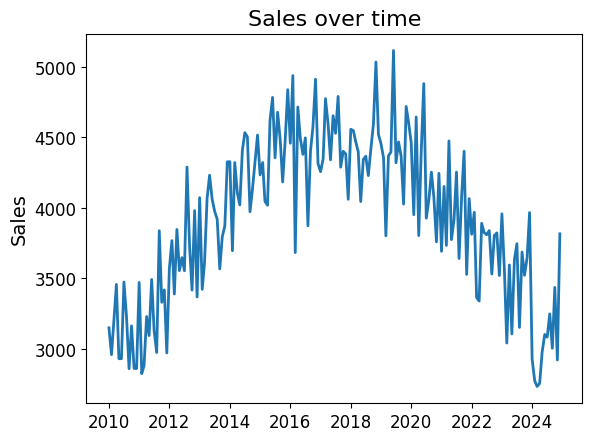

In [ ]:
# plot sales over time

plt.plot(df_sales["Date"], df_sales["Sales"], lw=2)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title("Sales over time", fontsize=16)
plt.ylabel("Sales", fontsize=14)
plt.show()

In [ ]:
# add new column: Marketing efforts as 5% of sales + noise N(100, 30)
np.random.seed(12345)
df_sales["Marketing"] = df_sales["Sales"] * 0.05 + np.random.normal(100, 30, len(df_sales))
df_sales["Marketing"].describe()

,Marketing
count,180.000000
mean,295.988244
std,39.093939
min,194.650881
25%,269.410465
50%,298.935105
75%,319.743003
max,404.633843


In [ ]:
# estimate OLS model with Year as numerical variable

model = smf.ols("Sales ~ Marketing + Year", data=df_sales, missing='drop').fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.405
Model:                            OLS   Adj. R-squared:                  0.398
Method:                 Least Squares   F-statistic:                     60.18
Date:                Sun, 15 Jun 2025   Prob (F-statistic):           1.15e-20
Time:                        12:50:40   Log-Likelihood:                -1349.6
No. Observations:                 180   AIC:                             2705.
Df Residuals:                     177   BIC:                             2715.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -6322.1856   1.53e+04     -0.412      0.6

In [ ]:
# estimate OLS model with Year as categorical variable

model = smf.ols("Sales ~ Marketing + C(Year)", data=df_sales, missing='drop').fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.794
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     42.05
Date:                Fri, 13 Jun 2025   Prob (F-statistic):           2.83e-48
Time:                        14:47:08   Log-Likelihood:                -1254.3
No. Observations:                 180   AIC:                             2541.
Df Residuals:                     164   BIC:                             2592.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2247.9072    195.755     

Reverse Causality

In [ ]:
np.random.seed(123)

# Number of observations
N = 100

# Unobserved firm-level factor (e.g. management quality)
firm_quality = np.random.normal(0, 1, N)

# Instrument: R&D subsidy (exogenous variation)
subsidy = np.random.normal(5, 1, N)

# R&D spending depends on subsidy and firm quality (endogenous)
rd = 5 + 1.5 * subsidy + 2.0 * firm_quality + np.random.normal(0, 1, N)

# Profit depends on R&D and firm quality (which is unobserved)
profit = 50 + 10 * rd + 20 * firm_quality + np.random.normal(0, 5, N)

# Put data in DataFrame
df_endo = pd.DataFrame({
    'profit': profit,
    'rd': rd,
    'subsidy': subsidy,
    'firm_quality': firm_quality  # only for simulation, not used in regression
})
df_endo

,profit,rd,subsidy,firm_quality
0,152.063972,11.995131,5.642055,-1.085631
1,175.099501,10.929754,3.022112,0.997345
2,215.714374,16.335056,5.712265,0.282978
3,163.661357,14.073163,7.598304,-1.506295
4,150.703461,11.299553,4.975374,-0.578600
...,...,...,...,...
95,172.699063,10.411434,1.768945,1.031114
96,144.878353,11.802724,4.730707,-1.084568
97,124.182220,10.022475,4.889149,-1.363472
98,185.820411,12.907453,4.658738,0.379401


In [ ]:
# naive OLS
ols_model = smf.ols('profit ~ rd', data=df_endo).fit()

# First Stage: explain R&D based on instrument
first_stage = smf.ols('rd ~ subsidy', data=df_endo).fit()
df_endo['rd_hat'] = first_stage.fittedvalues

# Second Stage: explain profit based on predicted R&D
second_stage = smf.ols('profit ~ rd_hat', data=df_endo).fit()

# Results
print("Naive OLS (biased due to endogeneity):")
print(ols_model.summary())

print("\nFirst Stage (rd ~ subsidy):")
print(first_stage.summary())

print("\nSecond Stage (profit ~ predicted rd):")
print(second_stage.summary())

Naive OLS (biased due to endogeneity):
                            OLS Regression Results                            
Dep. Variable:                 profit   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.913
Method:                 Least Squares   F-statistic:                     1037.
Date:                Sat, 14 Jun 2025   Prob (F-statistic):           6.30e-54
Time:                        11:47:17   Log-Likelihood:                -405.82
No. Observations:                 100   AIC:                             815.6
Df Residuals:                      98   BIC:                             820.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    